In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os.path import join
input_dir = "Dataset"

# Any results you write to the current directory are saved as output.

In [2]:
df_train = pd.read_csv(join(input_dir, 'train.csv'))
df_train_label = df_train['Survived']
del df_train['Survived']
df_test = pd.read_csv(join(input_dir, 'test.csv'))
df_test_label = pd.read_csv(join(input_dir, 'gender_submission.csv')).values[:,1]


Just Watch Train DataSet

In [4]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Just Watch Test Dataset

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The 'name' feature does not seem to be related to 'survival'.
So delete it

In [6]:
del df_train["Name"]
del df_test["Name"]

In [7]:
df_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,3,male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


Check Null Values

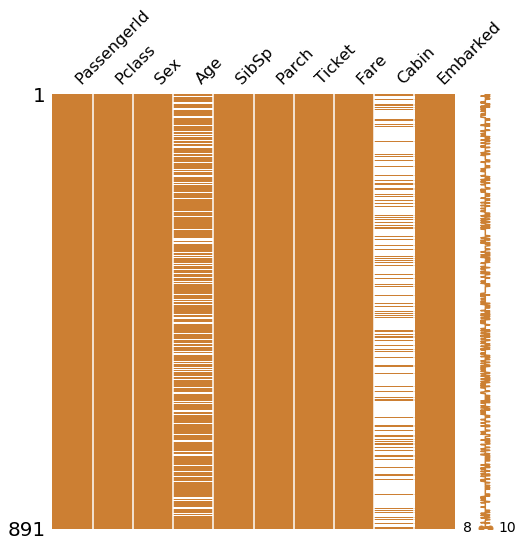

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

Back up Cabin Columns and delete from dataset

In [10]:
df_train_Cabin = df_train["Cabin"]
df_test_Cabin = df_test["Cabin"]

'Ticket' feature just means 'Ticket Number', So meaningless feature.

In [11]:
del df_train["Cabin"]
del df_test["Cabin"]
del df_train['Ticket']
del df_test['Ticket']

In [12]:
df_train.replace(np.NaN, np.nan, inplace=True)
df_test.replace(np.NaN, np.nan, inplace=True)

In [13]:
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [14]:
df_train_dummy = pd.get_dummies(df_train)
df_test_dummy = pd.get_dummies(df_test)

In [15]:
df_train_dummy.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
for c in df_train_dummy.columns : 
    df_train_dummy[c] = df_train_dummy[c].astype(np.float64)
# df_train_dummy.replace(np.NaN, np.nan, inplace=True)
# df_test_dummy.replace(np.NaN, np.nan, inplace=True)

In [17]:
from fancyimpute import IterativeImputer
train_mice = IterativeImputer(n_iter=200, verbose=False).fit_transform(df_train_dummy.values)
test_mice = IterativeImputer(n_iter=200,  verbose=False).fit_transform(df_test_dummy.values)


Using TensorFlow backend.


In [18]:
!pip3 list

Package                Version  
---------------------- ---------
appnope                0.1.0    
audioread              2.1.6    
backcall               0.1.0    
bleach                 1.5.0    
certifi                2018.4.16
cffi                   1.11.5   
chardet                3.0.4    
cvxpy                  1.0.8    
cycler                 0.10.0   
decorator              4.3.0    
dill                   0.2.8.2  
ecos                   2.0.5    
entrypoints            0.2.3    
enum34                 1.1.6    
fancyimpute            0.4.0    
fastcache              1.0.2    
future                 0.16.0   
graphviz               0.9      
h5py                   2.8.0    
html5lib               0.9999999
idna                   2.6      
ipykernel              4.8.2    
ipython                6.3.1    
ipython-genutils       0.2.0    
ipywidgets             7.2.1    
jedi                   0.12.0   
Jinja2                 2.10     
joblib                 0.12.0   
jsonschema

In [19]:
df_train_mice = pd.DataFrame(train_mice, columns = df_train_dummy.columns)
df_test_mice = pd.DataFrame(test_mice, columns = df_test_dummy.columns)

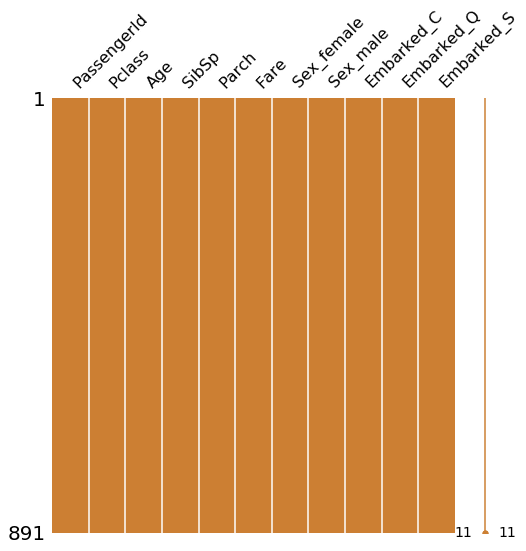

In [20]:
msno.matrix(df=df_train_mice.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

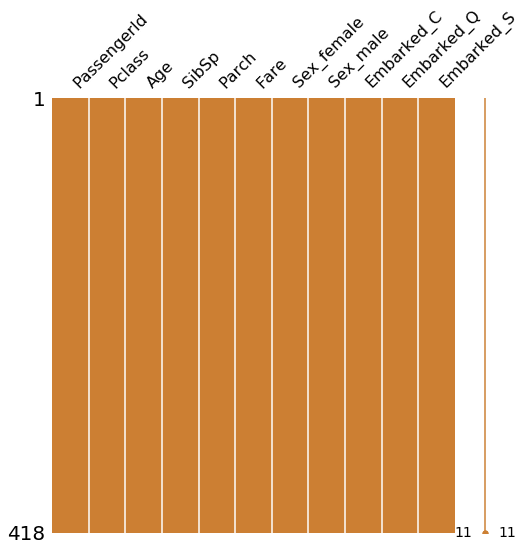

In [21]:
msno.matrix(df=df_test_mice.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

Let's Classify to use various Classifier!

### 1. Support Vector Machine Classifier

In [22]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear')
clf1.fit(df_train_mice, df_train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
test_result_clf1 = clf1.predict(df_test_mice)
test_result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### 2.Logistic Regression Classifier

In [24]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(df_train_mice, df_train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
test_result = clf2.score(df_test_mice,df_test_label)
test_result

0.9449760765550239

### 3. RandomForest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth = 5)
clf3.fit(df_train_mice, df_train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
test_result = clf3.score(df_test_mice,df_test_label)
test_result

0.9569377990430622

### 4. RidgeClassifier

In [28]:
from sklearn.linear_model import RidgeClassifier
clf4 = RidgeClassifier()
clf4.fit(df_train_mice, df_train_label)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [29]:
test_result = clf4.score(df_test_mice,df_test_label)
test_result

0.9617224880382775

In [30]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('svm', clf1),('lr',clf2),('RF', clf3),('Ridge',clf4)])
eclf.fit(df_train_mice, df_train_label)

VotingClassifier(estimators=[('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('lr', LogisticRegression(C=1.0, class_weight=None...True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [33]:
test_result = eclf.predict(df_test_mice)
test_result

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
submission = pd.DataFrame()

submission['PassengerId'] = df_test_mice['PassengerId'].astype(np.int64)

submission['Survived'] = test_result

grouped_test = submission[['PassengerId', 'Survived']].groupby('PassengerId').sum().reset_index()
grouped_test.to_csv('submit.csv',index=False)